In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner

import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

In [6]:
post_header= [
    'log10(m_b/m_star)',
    'm_c/m_star',
    'lambda_c',
    'P_c',
    'e_b',
    'e_c',
    'varpi_b',
    'varpi_c',
    'b_c',
    'Omega_c-Omega_b',
    'P_b',
    'delta_t',
    'likelihood']

post = pd.read_csv('zwift-post_equal_weights.dat', sep='    ', names=post_header, index_col=False)

neworder= [
    'log10(m_b/m_star)',
    'm_c/m_star',
    'delta_t',
    'lambda_c',
    'P_b',
    'P_c',
    'e_b',
    'e_c',
    'varpi_b',
    'varpi_c',
    'b_c',
    'Omega_c-Omega_b',
    'likelihood']
post=post.reindex(columns=neworder)


post['delta_t'] += 277
post

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,log10(m_b/m_star),m_c/m_star,delta_t,lambda_c,P_b,P_c,e_b,e_c,varpi_b,varpi_c,b_c,Omega_c-Omega_b,likelihood
0,-3.789250,0.000140,277.505137,1.422338,160.886100,834.173632,0.550391,0.157615,119.237379,113.106971,42.731154,14.427072,32.399100
1,-4.026843,0.000203,277.506257,192.965935,160.887114,813.942550,0.306108,0.115258,228.211713,294.243049,70.655403,200.054626,39.159296
2,-3.715592,0.000265,277.506154,205.579323,160.886804,819.544424,0.308940,0.119810,238.290024,299.946644,43.003537,155.884547,39.625916
3,-3.654945,0.000215,277.505681,220.432006,160.884553,831.967948,0.385138,0.136284,261.307778,307.853990,48.094482,237.851503,39.987656
4,-4.078714,0.000518,277.505636,231.500705,160.882998,797.124897,0.091606,0.084520,320.065796,8.284768,160.699853,185.852688,40.407403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29767,-3.787330,0.000596,277.505732,321.542163,160.879704,826.936260,0.168657,0.064978,114.645068,44.695910,133.913742,127.809548,56.802946
29768,-3.853078,0.000629,277.505768,321.115488,160.877286,837.936161,0.146088,0.108258,103.270544,33.353790,116.190240,122.397181,57.903251
29769,-3.853078,0.000629,277.505768,321.115488,160.877286,837.936161,0.146088,0.108258,103.270544,33.353790,116.190240,122.397181,57.903251
29770,-3.853078,0.000629,277.505768,321.115488,160.877286,837.936161,0.146088,0.108258,103.270544,33.353790,116.190240,122.397181,57.903251


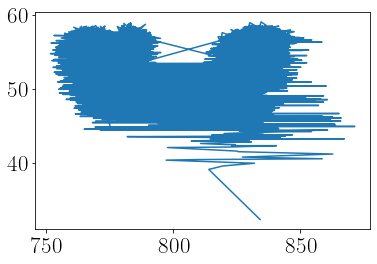

In [7]:
plt.plot(post['P_c'], post['likelihood'])





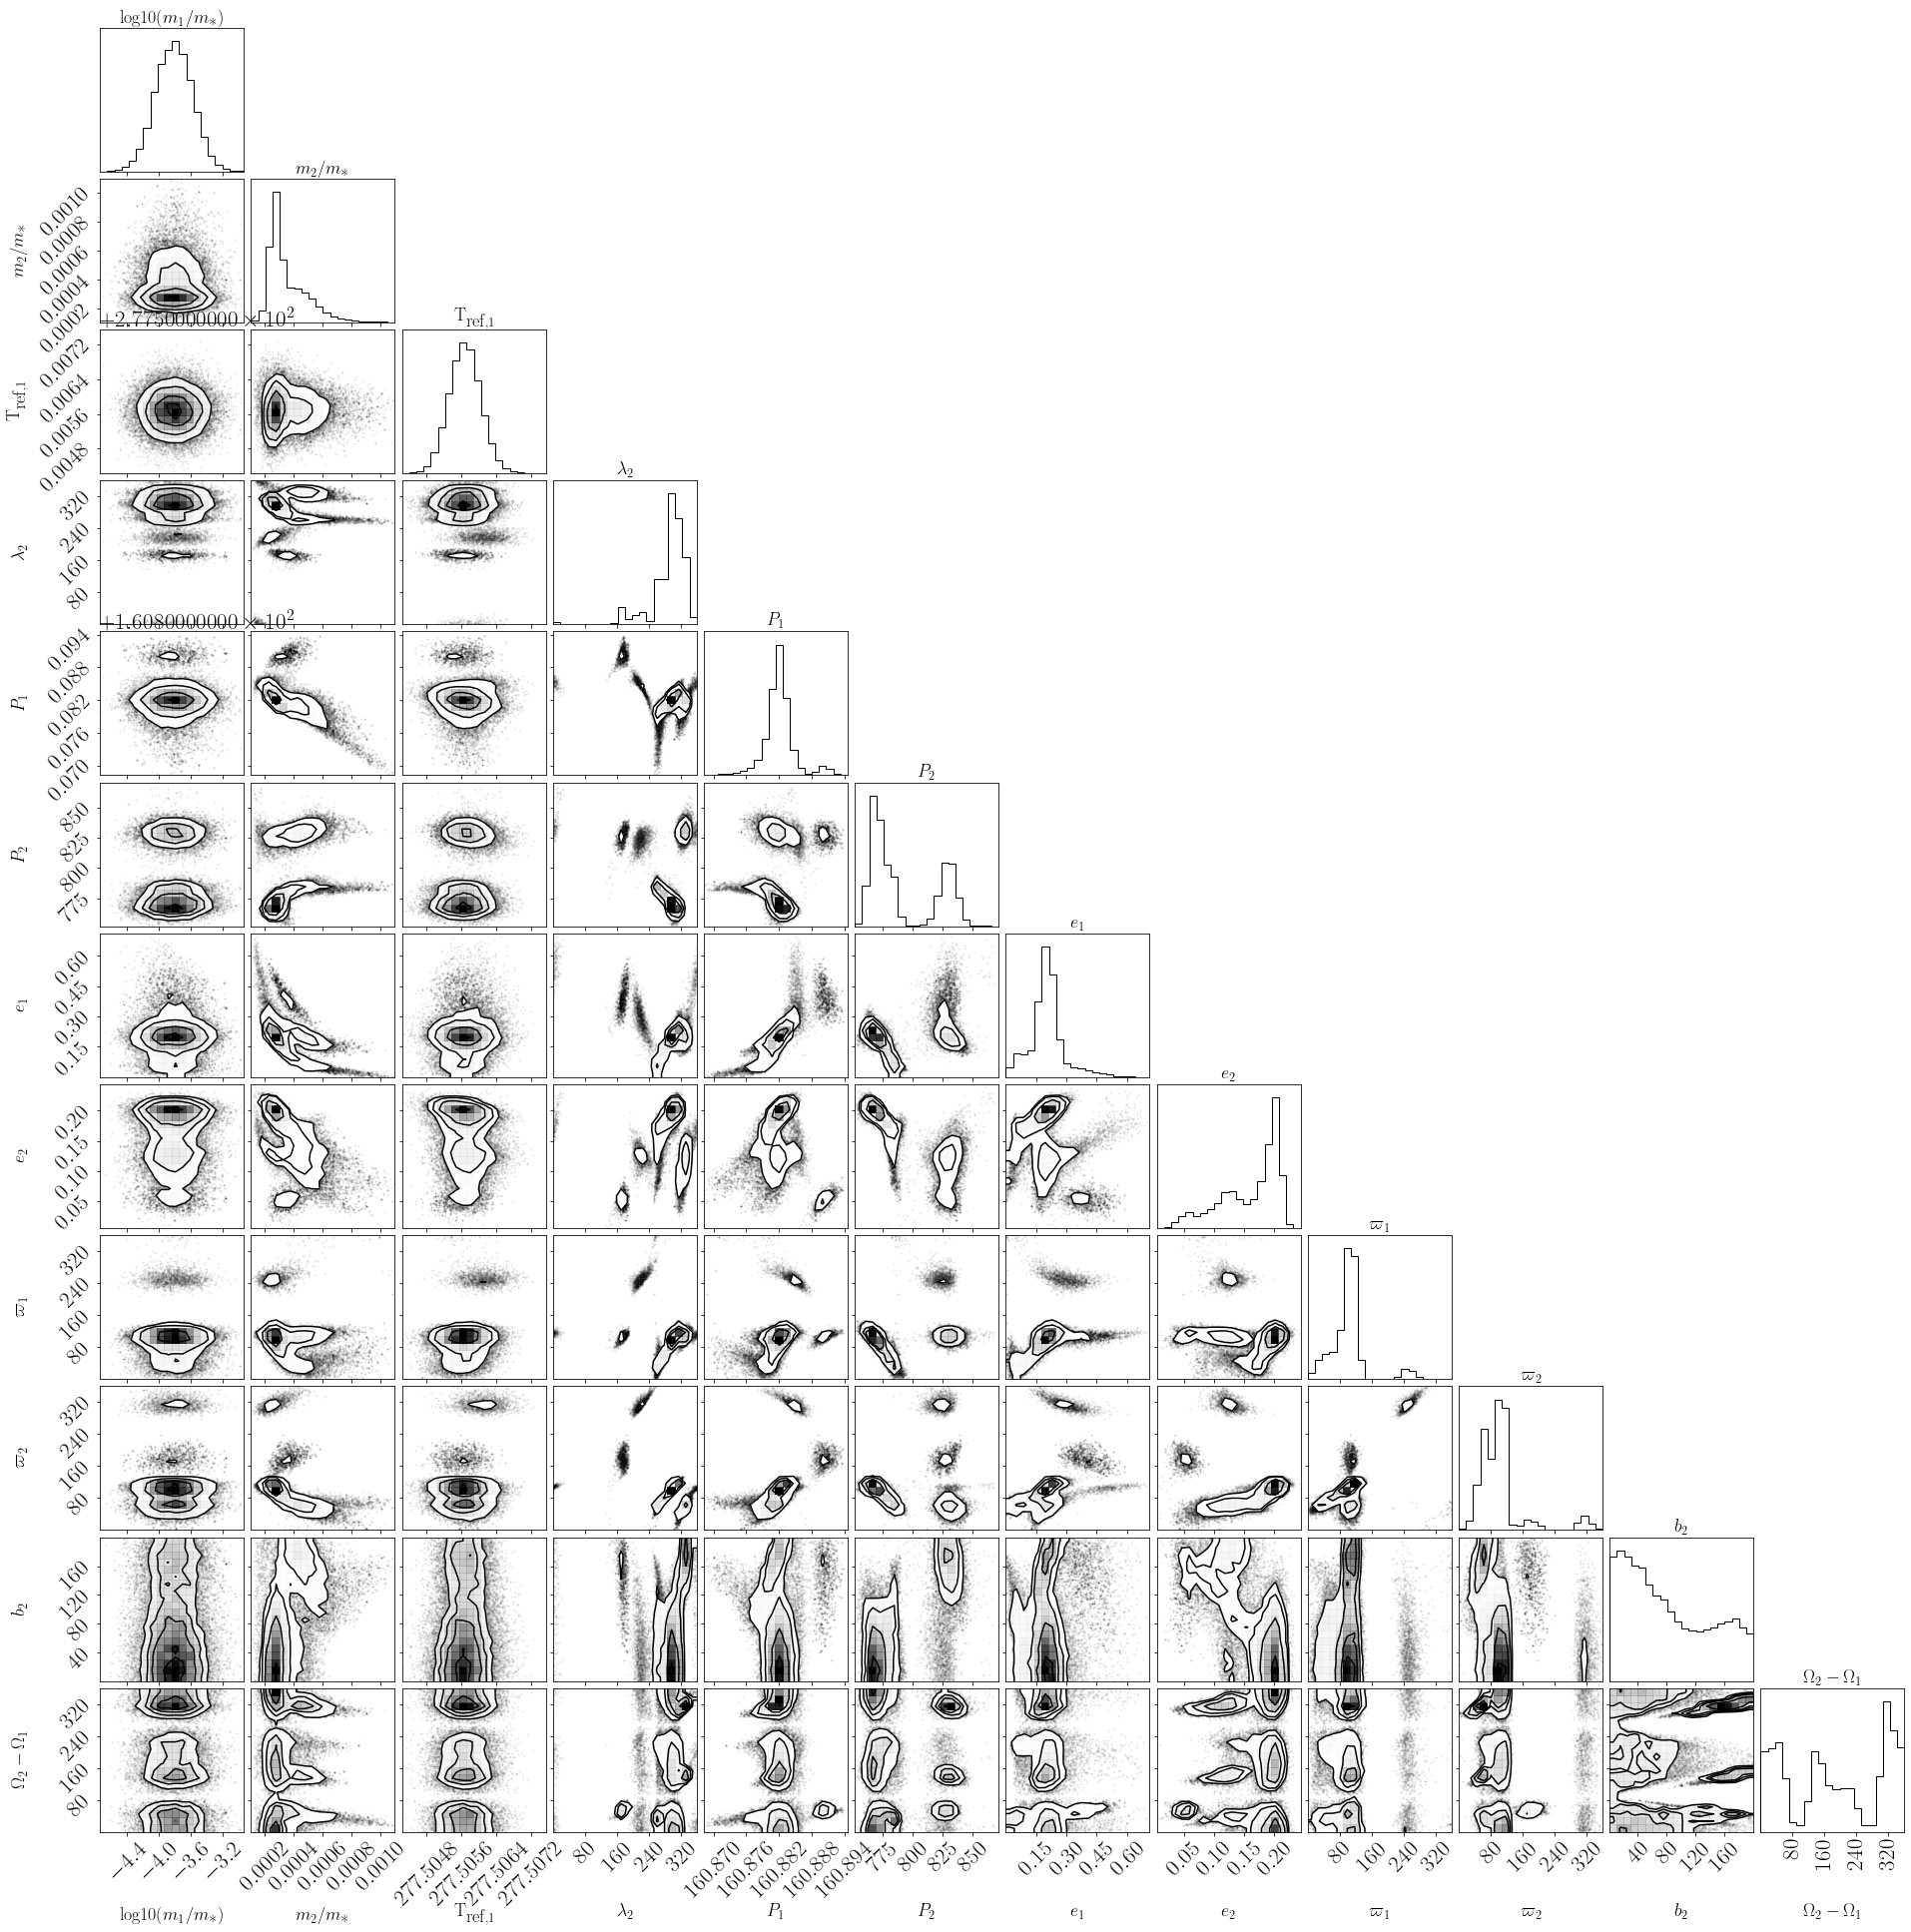

In [110]:
post_corner = post.drop(columns='likelihood')
post_labels= [
    r'log10($m_1$/$m_\textrm{*}$)',
    r'$m_2$/$m_\textrm{*}$',
    r'$\textrm{T}_{\textrm{ref}, 1}$',
    r'$\lambda_2$',
    r'$P_1$',
    r'$P_2$',
    r'$e_1$',
    r'$e_2$',
    r'$\varpi_1$',
    r'$\varpi_2$',
    r'$b_2$',
    r'$\Omega_2-\Omega_1$']



fig = corner.corner(post_corner, labels = post_labels, show_titles=True, title_kwargs={'fontsize': 18},
                    label_kwargs={'fontsize': 18}, labelpad=0.2, title_fmt=None)

ax_list = fig.axes
for ax in ax_list:
    try:
        ax.ticklabel_format(useOffset=False)
    except:
        AttributeError


plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig('swift_corner.pdf', bbox_inches='tight')
plt.show()


In [100]:
post_Pc = post.loc[post['P_c'] > 800]
post_bc = post_Pc.loc[post_Pc['b_c'] < 100]
post_final = post_bc.loc[post_bc['varpi_b'] > 180]



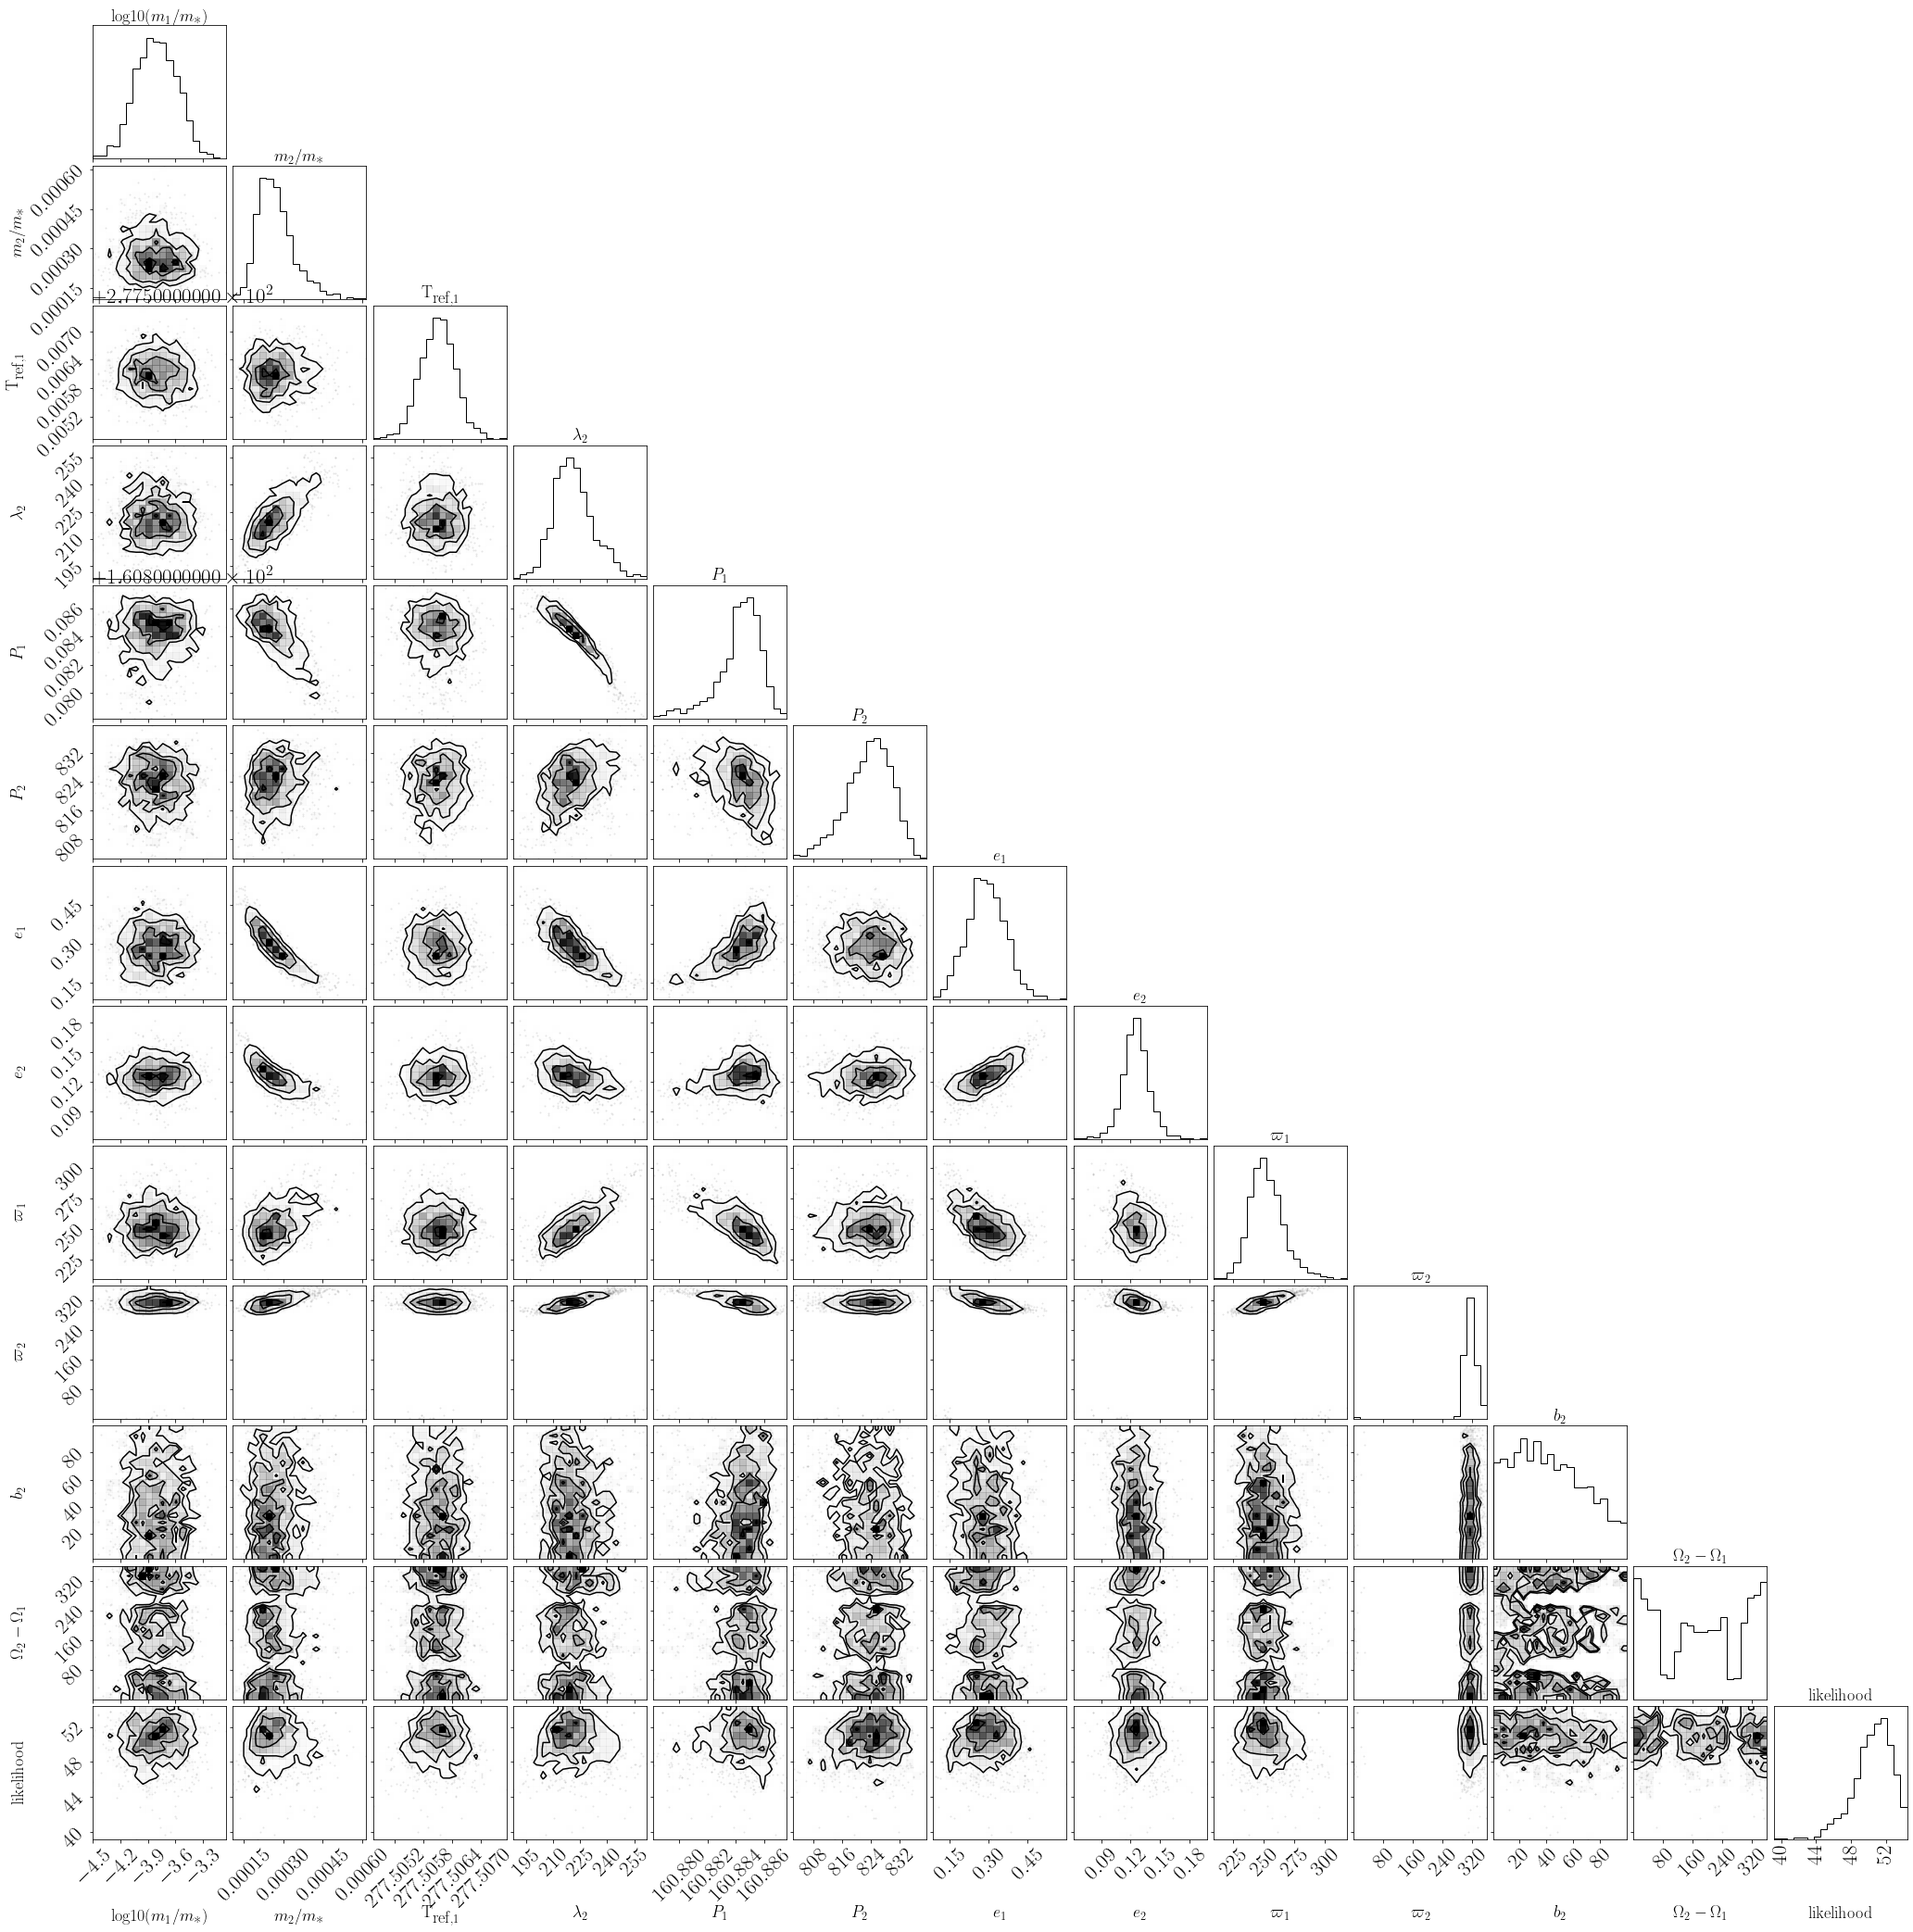

In [111]:
post_mode_corner = post.drop(columns='likelihood')
post_labels= [
    r'log10($m_1$/$m_\textrm{*}$)',
    r'$m_2$/$m_\textrm{*}$',
    r'$\textrm{T}_{\textrm{ref}, 1}$',
    r'$\lambda_2$',
    r'$P_1$',
    r'$P_2$',
    r'$e_1$',
    r'$e_2$',
    r'$\varpi_1$',
    r'$\varpi_2$',
    r'$b_2$',
    r'$\Omega_2-\Omega_1$',
    r'likelihood']

fig = corner.corner(post_final, labels = post_labels, show_titles=True, title_kwargs={'fontsize': 18},
                    label_kwargs={'fontsize': 18}, labelpad=0.2, title_fmt=None)

ax_list = fig.axes
for ax in ax_list:
    try:
        ax.ticklabel_format(useOffset=False)
    except:
        AttributeError


plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig('swift_corner_1mode.pdf', bbox_inches='tight')
plt.show()


In [104]:
headers = neworder[:-1]

['log10(m_b/m_star)', 'm_c/m_star', 'delta_t', 'lambda_c', 'P_b', 'P_c', 'e_b', 'e_c', 'varpi_b', 'varpi_c', 'b_c', 'Omega_c-Omega_b', 'likelihood']
['log10(m_b/m_star)', 'm_c/m_star', 'delta_t', 'lambda_c', 'P_b', 'P_c', 'e_b', 'e_c', 'varpi_b', 'varpi_c', 'b_c', 'Omega_c-Omega_b']


In [105]:
for label in headers:
    print(label, post_final[label].median(), post_final[label].std())


log10(m_b/m_star) -3.808225313457515 0.2249569323300465
m_c/m_star 0.0002613669466107798 7.068765317466839e-05
delta_t 277.5060940425844 0.0003692997813535902
lambda_c 220.2550686598294 11.438429909008041
P_b 160.8845156993095 0.00158967692005744
P_c 824.083885195405 6.369737062593725
e_b 0.2878495021999737 0.07242243398741995
e_c 0.1251523737057982 0.013965845990972874
varpi_b 251.6240885855434 13.987842649177688
varpi_c 313.1774852028553 33.962376643028065
b_c 40.53271484529182 25.830780899919883
Omega_c-Omega_b 182.8357767941045 115.4807317868467


In [109]:
m_b_m_star = 10**(post_final['log10(m_b/m_star)'])
print('m_b_m_star', np.median(m_b_m_star), np.std(m_b_m_star))



m_b_m_star 0.00015551586006951455 9.613098717522164e-05
